# India Air Quality Dataset 

### Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_predict

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\station_hour.csv")
#data=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\station_day.csv")
#data=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\city_day.csv")

In [3]:
data.shape

(1048488, 16)

In [4]:
station=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\stations.csv")

In [5]:
station.shape

(230, 5)

In [6]:
#df=data
df=pd.merge(data,station,on="StationId")
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,30-06-2020 23:00,24.25,40.75,1.23,10.82,6.78,8.75,0.61,11.12,31.77,0.12,1.10,0.30,55.0,Satisfactory,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,30-06-2020 22:00,30.25,49.00,1.33,17.10,10.20,9.82,0.71,11.78,29.32,0.30,3.85,0.32,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,30-06-2020 21:00,24.50,46.50,2.02,18.85,11.70,10.25,0.74,12.85,34.98,0.38,2.55,0.28,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,30-06-2020 20:00,28.75,39.00,1.50,14.05,8.68,9.40,0.76,11.95,39.98,0.32,1.40,0.15,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,30-06-2020 19:00,27.25,35.50,1.83,12.40,8.05,9.10,0.66,12.75,50.35,0.17,0.90,0.10,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [7]:
df["City"]=df["City"].str.lower()

In [8]:
df.tail()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
1048483,DL032,01-02-2018 15:00,106.0,227.0,1.93,16.30,18.25,63.29,0.74,7.78,NaN,NaN,NaN,NaN,NaN,NaN,"Rohini, Delhi - DPCC",delhi,Delhi,Active
1048484,DL032,01-02-2018 14:00,123.0,269.0,1.70,16.08,17.75,62.74,0.72,6.72,NaN,NaN,NaN,NaN,NaN,NaN,"Rohini, Delhi - DPCC",delhi,Delhi,Active
1048485,DL032,01-02-2018 13:00,163.0,318.0,2.66,19.12,21.79,60.58,0.91,7.03,NaN,NaN,NaN,NaN,NaN,NaN,"Rohini, Delhi - DPCC",delhi,Delhi,Active
1048486,DL032,01-02-2018 12:00,229.0,453.0,5.58,26.74,32.30,57.65,1.20,11.75,NaN,NaN,NaN,NaN,NaN,NaN,"Rohini, Delhi - DPCC",delhi,Delhi,Active
1048487,DL032,01-02-2018 11:00,259.0,504.0,NaN,NaN,146.80,9.43,0.39,0.80,NaN,NaN,NaN,NaN,NaN,NaN,"Rohini, Delhi - DPCC",delhi,Delhi,Active


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048488 entries, 0 to 1048487
Data columns (total 20 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   StationId    1048488 non-null  object 
 1   Datetime     1048488 non-null  object 
 2   PM2.5        800121 non-null   float64
 3   PM10         705781 non-null   float64
 4   NO           817879 non-null   float64
 5   NO2          831375 non-null   float64
 6   NOx          855833 non-null   float64
 7   NH3          581748 non-null   float64
 8   CO           827438 non-null   float64
 9   SO2          664292 non-null   float64
 10  O3           798012 non-null   float64
 11  Benzene      701794 non-null   float64
 12  Toluene      672121 non-null   float64
 13  Xylene       213410 non-null   float64
 14  AQI          808992 non-null   float64
 15  AQI_Bucket   808992 non-null   object 
 16  StationName  1048488 non-null  object 
 17  City         1048488 non-null  object 
 18  St

In [10]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,800121.000000,705781.000000,817879.000000,831375.000000,855833.000000,581748.000000,827438.000000,664292.000000,798012.000000,701794.000000,672121.000000,213410.000000,808992.000000
mean,105.019131,201.526548,31.514517,43.682542,52.394115,35.917224,1.394412,14.910112,43.311444,3.276467,20.038358,2.232764,226.958824
std,101.431952,156.388572,59.492032,39.408620,68.463083,27.004742,2.117047,13.355241,61.673787,6.238386,37.994544,7.599092,133.207457
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,16.000000
25%,39.500000,89.810000,3.620000,18.150000,13.900000,19.270000,0.540000,6.620000,10.980000,0.240000,0.920000,0.000000,114.000000
50%,72.000000,159.150000,9.580000,31.890000,29.150000,30.730000,0.950000,11.600000,25.030000,1.550000,6.750000,0.230000,198.000000
75%,135.500000,268.390000,29.130000,56.560000,60.030000,45.980000,1.600000,18.780000,53.670000,4.150000,23.500000,1.630000,320.000000
max,1000.000000,1000.000000,500.000000,499.970000,500.000000,494.110000,50.000000,199.770000,997.000000,491.510000,499.800000,476.310000,1113.000000


In [11]:
df.shape

(1048488, 20)

In [12]:
num_col = list(df.select_dtypes(include='float').columns)

In [13]:
df.columns

Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'Status'],
      dtype='object')

<Axes: >

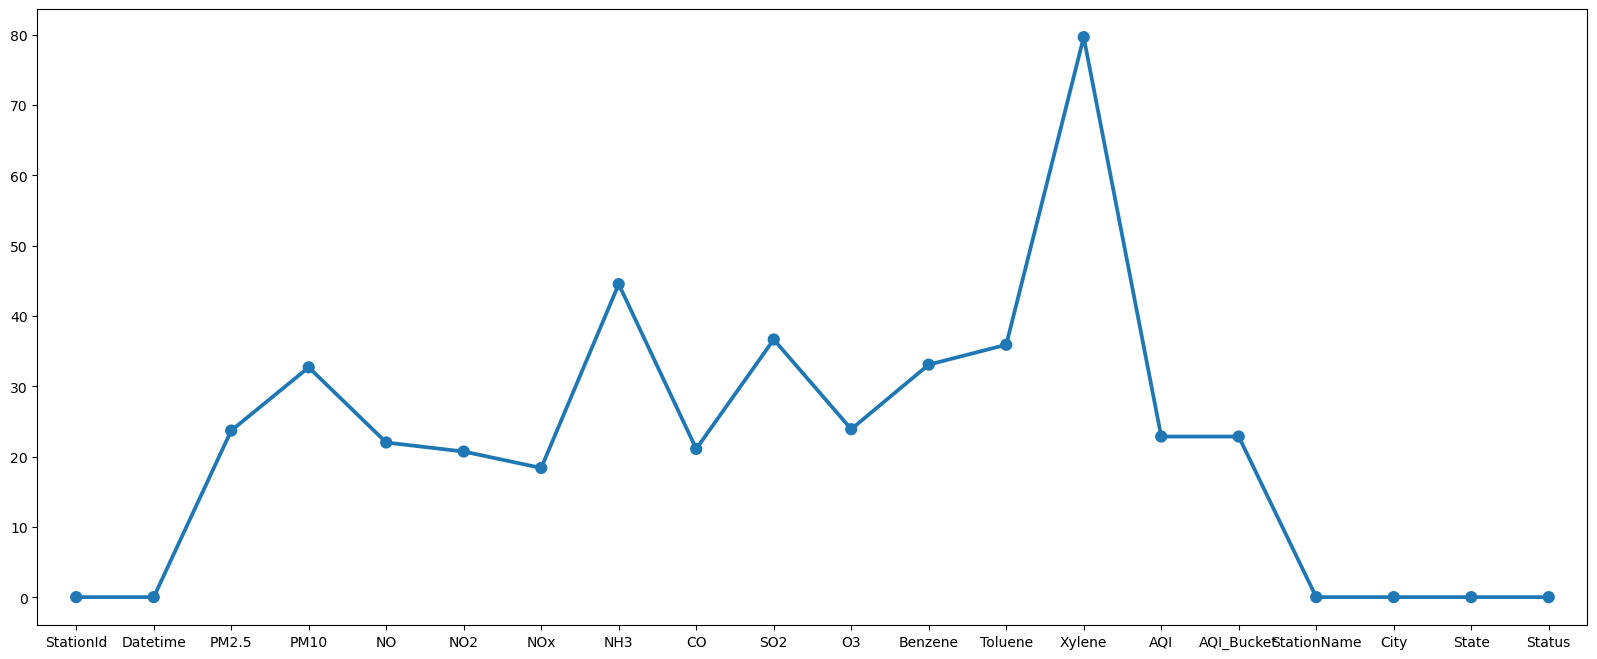

In [14]:
l1=[]
for i in df:
    l1.append(((df[str(i)].isnull().sum())/df.shape[0])*100)
l2=df.columns
plt.figure(figsize=(20,8))
sns.pointplot(x=l2,y=l1)

In [15]:
null_value_percent=pd.DataFrame(l1,index=l2)
null_value_percent

,0
StationId,0.000000
Datetime,0.000000
PM2.5,23.688111
PM10,32.685829
NO,21.994434
NO2,20.707247
NOx,18.374555
NH3,44.515531
CO,21.082740
SO2,36.642861


In [16]:
df.drop(["Benzene","Toluene","Xylene","NO"],axis=1,inplace=True)

In [17]:
df["StationId"].nunique()

42

In [18]:
# Station id wise empty
df_n=df.select_dtypes(exclude="object")
df_n["StationId"]=df["StationId"]
col=list(df_n.columns)
col.pop()
l5=[]
for i in col:
    l5.append(df.groupby(["StationId"])[i].mean().isnull().sum())
print(pd.DataFrame(l5,index=col))

        0
PM2.5   1
PM10    4
NO2     0
NOx     1
NH3    10
CO      1
SO2     8
O3      1
AQI     1


In [19]:
df["City"].value_counts()

delhi            907412
patna             63998
visakhapatnam     35040
amaravati         22776
guwahati          12000
chandigarh         7262
Name: City, dtype: int64

In [20]:
# City wise empty
df_n=df.select_dtypes(exclude=['object'])
df_n["City"]=df["City"]
col = list(df_n.columns)
col.pop()
l3=[]
for i in col:
    l3.append((df.groupby(["City"])[str(i)].mean().isnull().sum()))

null_val=pd.DataFrame(l3,index=col)
print(null_val)

       0
PM2.5  0
PM10   0
NO2    0
NOx    0
NH3    0
CO     0
SO2    0
O3     0
AQI    0


In [21]:
df.isnull().sum()

StationId           0
Datetime            0
PM2.5          248367
PM10           342707
NO2            217113
NOx            192655
NH3            466740
CO             221050
SO2            384196
O3             250476
AQI            239496
AQI_Bucket     239496
StationName         0
City                0
State               0
Status              0
dtype: int64

In [22]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,30-06-2020 23:00,24.25,40.75,10.82,6.78,8.75,0.61,11.12,31.77,55.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
1,AP001,30-06-2020 22:00,30.25,49.00,17.10,10.20,9.82,0.71,11.78,29.32,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2,AP001,30-06-2020 21:00,24.50,46.50,18.85,11.70,10.25,0.74,12.85,34.98,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
3,AP001,30-06-2020 20:00,28.75,39.00,14.05,8.68,9.40,0.76,11.95,39.98,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
4,AP001,30-06-2020 19:00,27.25,35.50,12.40,8.05,9.10,0.66,12.75,50.35,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active


In [23]:
df["Date"]=pd.to_datetime(data["Datetime"])
#df["Date"]=pd.to_datetime(data["Date"])

In [24]:
df.index = df["Date"]
df.drop(["Date"],axis=1,inplace=True)

In [25]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,StationName,City,State,Status
Date,,,,,,,,,,,,,,,,
2020-06-30 23:00:00,AP001,30-06-2020 23:00,24.25,40.75,10.82,6.78,8.75,0.61,11.12,31.77,55.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2020-06-30 23:00:00,AP001,30-06-2020 22:00,30.25,49.00,17.10,10.20,9.82,0.71,11.78,29.32,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2020-06-30 23:00:00,AP001,30-06-2020 21:00,24.50,46.50,18.85,11.70,10.25,0.74,12.85,34.98,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2020-06-30 23:00:00,AP001,30-06-2020 20:00,28.75,39.00,14.05,8.68,9.40,0.76,11.95,39.98,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2020-06-30 23:00:00,AP001,30-06-2020 19:00,27.25,35.50,12.40,8.05,9.10,0.66,12.75,50.35,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active


In [26]:
df.shape

(1048488, 16)

In [27]:
df["City"].nunique()

6

In [28]:
df=df.drop(["Datetime"],axis=1)

In [29]:
num_col=df.select_dtypes(include="float64")

In [30]:
num_col["StationId"]=df["StationId"]

In [31]:
grouped_df=num_col.groupby(['StationId']).mean

In [32]:
grouped_df

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002460790D0C0>>

In [33]:
grouped_df=df.groupby(['StationId']).mean()
df_filled=grouped_df.transform(lambda x :x.fillna(x.mean()))
df_filled

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
StationId,,,,,,,,,
AP001,38.489207,77.011887,21.938609,15.221468,12.085474,0.618698,14.096422,38.147140,95.602137
AP005,47.852818,106.753808,37.359742,25.042680,10.984300,0.733717,12.748096,38.095152,117.732337
AS001,61.773630,113.875647,13.604696,44.478980,10.876328,0.737507,14.578483,25.000051,140.255729
BR005,66.200272,113.634368,30.775098,27.636924,20.422384,0.549864,4.655874,38.122025,127.763033
BR006,38.367786,139.785604,9.687173,9.756939,13.284629,0.637212,7.389969,6.487256,127.923235
BR007,129.733411,191.960407,39.807684,41.537379,33.641320,1.606444,24.794454,40.469557,249.131932
BR008,51.578018,128.008993,32.619571,48.721934,31.785469,0.899926,5.190413,12.187467,126.148966
BR009,49.626374,110.208921,68.527769,64.803223,18.824959,0.924979,11.840733,28.580381,135.837477
BR010,68.493761,118.457214,20.614634,142.315267,13.763772,1.859793,13.720928,39.903506,204.271090


In [34]:
grouped_df=df.groupby('StationId')
df_filled=grouped_df.transform(lambda x :x.fillna(x.mean()))
df_filled

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,
2020-06-30 23:00:00,24.25,40.75,10.820000,6.78,8.75,0.61,11.12,31.770000,55.000000
2020-06-30 23:00:00,30.25,49.00,17.100000,10.20,9.82,0.71,11.78,29.320000,78.000000
2020-06-30 23:00:00,24.50,46.50,18.850000,11.70,10.25,0.74,12.85,34.980000,78.000000
2020-06-30 23:00:00,28.75,39.00,14.050000,8.68,9.40,0.76,11.95,39.980000,78.000000
2020-06-30 23:00:00,27.25,35.50,12.400000,8.05,9.10,0.66,12.75,50.350000,78.000000
...,...,...,...,...,...,...,...,...,...
2015-01-01 02:00:00,106.00,227.00,16.300000,18.25,63.29,0.74,7.78,49.739503,305.642159
2015-01-01 01:00:00,123.00,269.00,16.080000,17.75,62.74,0.72,6.72,49.739503,305.642159
2015-01-01 01:00:00,163.00,318.00,19.120000,21.79,60.58,0.91,7.03,49.739503,305.642159


In [35]:
df_filled.isnull().sum()

PM2.5     37235
PM10     178161
NO2           0
NOx       37235
NH3      322314
CO        37235
SO2      196880
O3        48191
AQI       37235
dtype: int64

In [36]:
groupedcity_df=df.groupby("City")

In [37]:
df_filled=groupedcity_df.transform(lambda x:x.fillna(x.mean()))

In [38]:
df_filled.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

df_temp=df.select_dtypes(include="float64")
num_col=df_temp.columns

for i in num_col:
    pm_mean=df_filled[i].mean()
    df_filled[i]=df_filled[i].fillna(pm_mean)

In [39]:
df_temp=df.select_dtypes(include="float64")
num_col=df_temp.columns

In [40]:
df_filled.shape

(1048488, 9)

In [41]:
df_filled.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [42]:
def outlier_removal(data,k=1):
    mean_value=data.mean()
    data=data.to_list()
    
    q3=np.percentile(data,75)
    q1=np.percentile(data,25)

    iqr=q3-q1

    lower_range=q1-(iqr*1.5)
    higher_range=q3+(iqr*1.5)
    
    
    for i,j in enumerate(data):
        if (j<=lower_range or j>=higher_range):
            data[i]=mean_value
    return data

In [43]:
for j in range(0,4):
    for i in num_col:
        df_filled[i]=outlier_removal(df_filled[i])

In [44]:
num_col

Index(['PM2.5', 'PM10', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

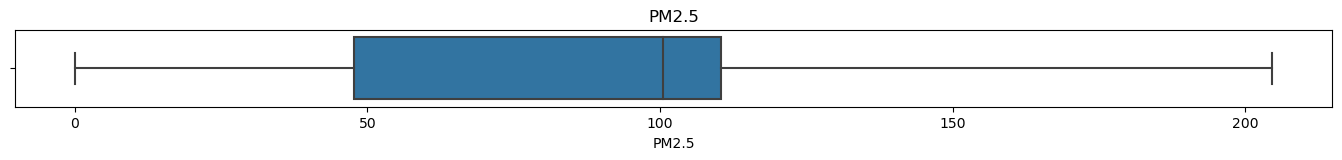

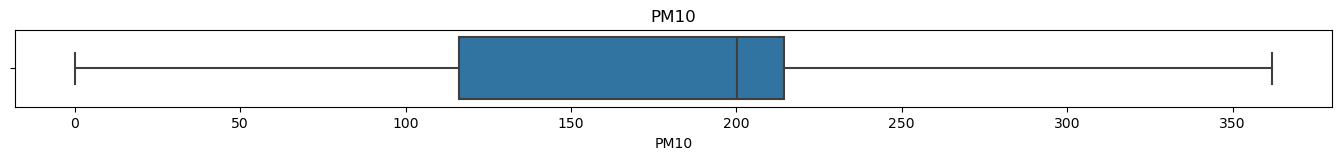

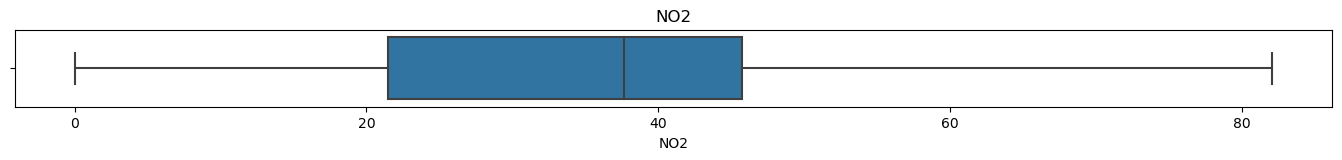

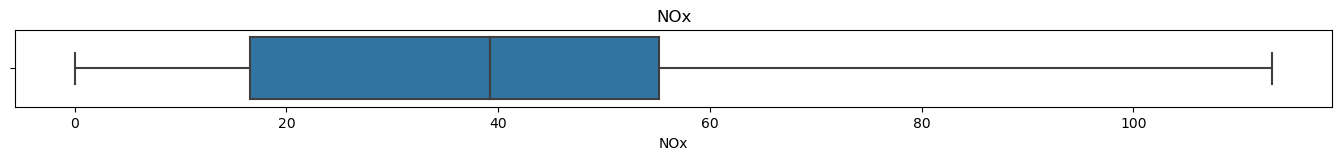

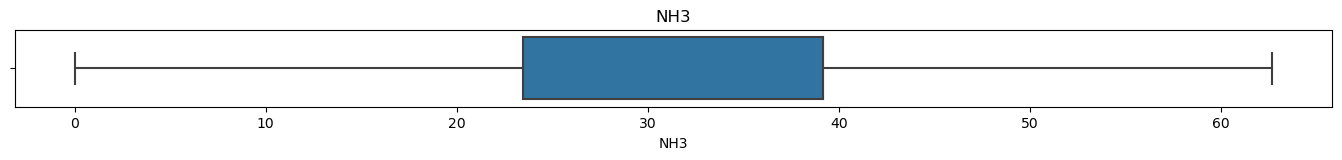

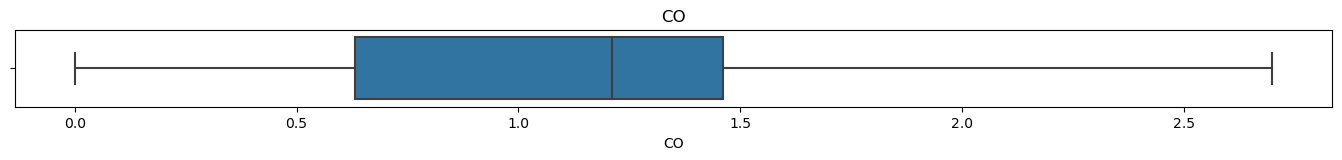

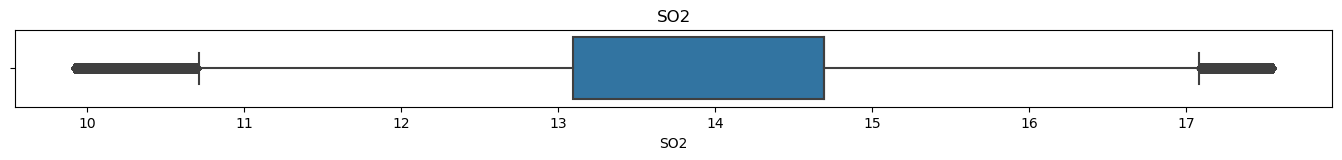

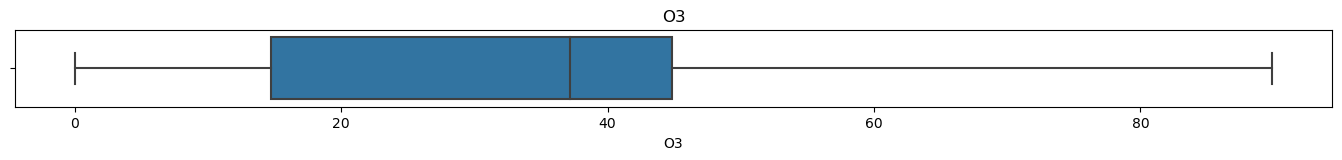

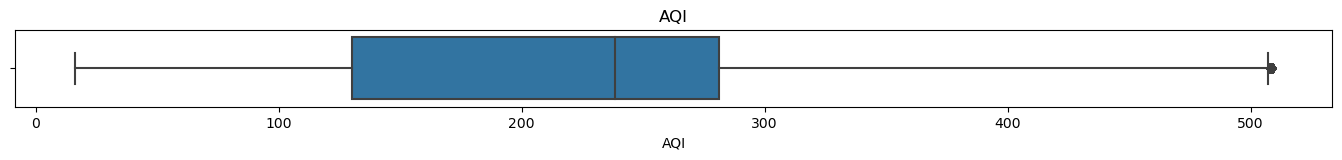

In [45]:
#Printing boxplot for each numerical column present in the data set
for i in num_col:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df_filled, x=i)
    plt.title(i)
plt.show()

In [46]:
df_filled["city"]=df["City"]
cities=list(df_filled["city"].unique())
cities

['amaravati', 'visakhapatnam', 'guwahati', 'patna', 'chandigarh', 'delhi']

In [47]:
df_filled

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI,city
Date,,,,,,,,,,
2020-06-30 23:00:00,24.250000,40.750000,10.820000,6.780000,8.750000,0.61,11.120000,31.770000,55.000000,amaravati
2020-06-30 23:00:00,30.250000,49.000000,17.100000,10.200000,9.820000,0.71,11.780000,29.320000,78.000000,amaravati
2020-06-30 23:00:00,24.500000,46.500000,18.850000,11.700000,10.250000,0.74,12.850000,34.980000,78.000000,amaravati
2020-06-30 23:00:00,28.750000,39.000000,14.050000,8.680000,9.400000,0.76,11.950000,39.980000,78.000000,amaravati
2020-06-30 23:00:00,27.250000,35.500000,12.400000,8.050000,9.100000,0.66,12.750000,50.350000,78.000000,amaravati
...,...,...,...,...,...,...,...,...,...,...
2015-01-01 02:00:00,106.000000,227.000000,16.300000,18.250000,36.036565,0.74,13.626803,44.809586,238.548453,delhi
2015-01-01 01:00:00,123.000000,269.000000,16.080000,17.750000,36.036565,0.72,13.626803,44.809586,238.548453,delhi
2015-01-01 01:00:00,163.000000,318.000000,19.120000,21.790000,60.580000,0.91,13.626803,44.809586,238.548453,delhi


In [48]:
df_filled.shape
df_filled["city"]=df["City"]

In [49]:
df_filled["city"]=df["City"].str.lower()

In [51]:
dist=input("Give the district name or number to predict Air Quality in above given districts")

def city(dist):
    if (int(dist)==1) or (str(dist).lower()=="delhi"):
        city_name="delhi"
        return city_name
    elif (int(dist)==2) or (str(dist).lower()=="amaravati"):
        city_name ="amaravati"
        return city_name
    elif (int(dist)==3) or (str(dist).lower()=="guwahati"):
        city_name="guwahati"
        return city_name
    elif (int(dist)==4) or (str(dist).lower()=="patna"):
        city_name="patna"
        return city_name
    elif (int(dist)==5 or (str(dist).lower()=="chandigarh")):
        city_name="chandigarh"
        return city_name
    elif (int(dist)==6) or (str(dist).lower()=="visakhapatnam"):
        city_name="visakhapatnam"
        return city_name
    else:
        print("Specify right index")
        
city_name=city(dist)

Give the district name or number to predict Air Quality in above given districts1


## City name

In [52]:
city_name="delhi"

In [53]:
groupedcity_df=df_filled.groupby("city")

In [54]:
delhi=groupedcity_df.get_group((city_name.lower()))
delhi.drop(["city"],axis=1,inplace=True)

In [55]:
delhi.head()

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,
2020-03-02 17:00:00,81.0,181.75,15.30,7.95,32.55,0.78,10.680000,7.72,107.0
2020-03-02 17:00:00,57.0,166.00,10.77,5.45,27.20,0.83,10.150000,10.07,106.0
2020-03-02 17:00:00,42.5,152.25,10.12,4.95,28.02,0.57,13.626803,11.50,105.0
2020-03-02 17:00:00,39.0,137.00,8.80,4.25,29.40,0.57,13.626803,13.10,104.0
2020-03-02 17:00:00,40.5,130.75,8.60,4.33,36.58,0.55,13.626803,13.68,102.0


In [56]:
delhi = delhi.resample('H').mean()

In [57]:
delhi.isnull().sum()

PM2.5    7254
PM10     7254
NO2      7254
NOx      7254
NH3      7254
CO       7254
SO2      7254
O3       7254
AQI      7254
dtype: int64

In [58]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)

imputed_data = knn_imputer.fit_transform(delhi)

In [59]:
delhi_imputed = pd.DataFrame(imputed_data, columns=delhi.columns,index=delhi.index)

In [60]:
delhi_imputed.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [61]:
delhi_imputed

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,
2015-01-01 01:00:00,124.181283,246.859122,26.911770,31.112378,40.924141,0.805000,13.475692,44.809586,238.548453
2015-01-01 02:00:00,96.750000,212.250000,17.345000,20.845000,40.214923,0.737500,13.361635,44.809586,238.548453
2015-01-01 03:00:00,125.431283,224.163683,43.939753,96.690000,27.291641,1.496667,14.130398,44.809586,238.548453
2015-01-01 04:00:00,108.544131,220.246354,34.264270,38.872500,36.820166,1.267500,13.083379,44.809586,238.548453
2015-01-01 05:00:00,116.725696,238.524464,34.616039,47.123206,37.603768,1.388390,13.893357,44.809586,344.000000
...,...,...,...,...,...,...,...,...,...
2020-12-01 19:00:00,144.694096,234.820794,49.433341,56.122207,36.036565,1.323480,14.295356,16.598684,370.815789
2020-12-01 20:00:00,111.016809,223.995608,46.867804,57.193535,36.658497,1.773597,14.023048,16.800789,357.447368
2020-12-01 21:00:00,113.578018,216.578521,43.614085,54.937958,37.259640,1.837018,12.868264,14.375000,352.397527


In [62]:
delhi=delhi_imputed

In [63]:
start_date="2019-01-01"
end_date="2019-12-30"
mask = (delhi.index >= start_date) & (delhi.index <= end_date)
selected_data =delhi.iloc[mask]
#selected_data = delhi[delhi.index <= end_date]
selected_data.shape

(8713, 9)

In [ ]:
start_date="2019-01-01"
end_date="2019-12-30"
mask = (delhi.index >= start_date) & (delhi.index <= end_date)
selected_data =delhi.iloc[mask]
#selected_data = delhi[delhi.index start_date delhi.index <= end_date]
selected_data.shape

In [64]:
selected_data

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,
2019-01-01 00:00:00,59.522133,214.548929,34.016372,23.920943,47.429934,0.804968,13.840433,44.809586,197.581625
2019-01-01 01:00:00,55.344788,214.548929,34.486299,25.570965,42.716822,0.668928,14.067806,44.809586,73.529412
2019-01-01 02:00:00,51.595588,214.548929,41.334392,38.670000,46.959982,0.709412,14.029349,44.809586,91.176471
2019-01-01 03:00:00,100.204781,214.548929,46.577628,44.556456,46.051343,1.102549,14.290019,44.809586,169.852941
2019-01-01 04:00:00,56.140629,214.548929,33.631471,23.688824,47.349706,0.688235,14.371846,44.809586,185.882353
...,...,...,...,...,...,...,...,...,...
2019-12-29 20:00:00,98.946996,212.120773,46.163008,53.306672,24.535801,1.579402,13.955899,44.663854,371.282051
2019-12-29 21:00:00,109.727245,254.106868,43.643307,49.877186,25.539143,1.668291,13.320454,32.952123,262.358974
2019-12-29 22:00:00,116.165391,284.612128,51.475998,57.674690,32.030080,1.623106,13.526213,29.459449,304.128205


In [65]:
delhi=selected_data

In [66]:
for i in num_col:
  delhi[i] = delhi[i].fillna(method='ffill')

In [67]:
delhi.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

### implementing VAR Model for Delhi Data

In [68]:
# Augmented Dickey Fuller Test
import statsmodels.api
from statsmodels.graphics.tsaplots import plot_acf

In [69]:
# Stability Test
def stability_test(series):
    result=statsmodels.tsa.stattools.adfuller(series,autolag="AIC")
    print(result)
    if result[1]>=0.05:
        print("data is not stationary")
    else:
        print("procede VAR data is Stationary")

In [70]:
for i in num_col:
    print(f"{i}")
    stability_test(delhi[i])

PM2.5
(-9.525987285519792, 2.977018423348082e-16, 36, 8676, {'1%': -3.431103946037094, '5%': -2.86187319370042, '10%': -2.5669473540533323}, 73833.9951359563)
procede VAR data is Stationary
PM10
(-10.563340531761469, 7.627756961519174e-19, 33, 8679, {'1%': -3.4311036853495014, '5%': -2.8618730785085593, '10%': -2.566947292735891}, 83709.49346670565)
procede VAR data is Stationary
NO2
(-10.690484542509873, 3.7370364124024584e-19, 27, 8685, {'1%': -3.4311031645147616, '5%': -2.8618728483636184, '10%': -2.5669471702281177}, 57049.49152842212)
procede VAR data is Stationary
NOx
(-10.318287261501155, 3.0561412712362174e-18, 33, 8679, {'1%': -3.4311036853495014, '5%': -2.8618730785085593, '10%': -2.566947292735891}, 62830.0268206601)
procede VAR data is Stationary
NH3
(-10.015400624130502, 1.7342590459804275e-17, 32, 8680, {'1%': -3.4311035984936935, '5%': -2.86187304012897, '10%': -2.566947272306165}, 48746.9511246616)
procede VAR data is Stationary
CO
(-10.440442157465329, 1.52695448092847

In [154]:
# train test data split
tests=24
test=delhi[-tests:]
train=delhi[:-tests]

In [155]:
train

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,
2019-01-01 00:00:00,59.522133,214.548929,34.016372,23.920943,47.429934,0.804968,13.840433,44.809586,197.581625
2019-01-01 01:00:00,55.344788,214.548929,34.486299,25.570965,42.716822,0.668928,14.067806,44.809586,73.529412
2019-01-01 02:00:00,51.595588,214.548929,41.334392,38.670000,46.959982,0.709412,14.029349,44.809586,91.176471
2019-01-01 03:00:00,100.204781,214.548929,46.577628,44.556456,46.051343,1.102549,14.290019,44.809586,169.852941
2019-01-01 04:00:00,56.140629,214.548929,33.631471,23.688824,47.349706,0.688235,14.371846,44.809586,185.882353
...,...,...,...,...,...,...,...,...,...
2019-12-28 20:00:00,96.910526,224.309312,49.997305,64.265818,34.242130,1.193283,13.990586,49.064503,296.822204
2019-12-28 21:00:00,89.667311,246.234699,44.776066,55.004050,27.003758,1.461567,13.597647,44.796509,368.432333
2019-12-28 22:00:00,88.974359,279.189761,50.786564,56.852553,30.724615,1.704388,14.255423,35.348239,320.461538


In [156]:
test

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,
2019-12-29 01:00:00,107.971808,243.241043,46.093897,51.933071,24.459487,1.436559,13.699126,36.245712,288.589744
2019-12-29 02:00:00,116.361756,224.977201,47.170612,46.494423,24.564014,1.349846,13.557669,29.813585,429.502856
2019-12-29 03:00:00,95.114109,284.938947,38.345945,49.134309,13.750168,1.509231,13.813055,24.045237,370.822273
2019-12-29 04:00:00,94.886667,261.403742,40.375415,43.153393,18.574872,1.797550,13.379888,33.880988,266.564103
2019-12-29 05:00:00,75.321515,234.840184,39.496275,42.557354,14.350769,1.570661,13.484253,18.103077,280.512821
2019-12-29 06:00:00,55.000000,167.270908,38.509917,47.397167,10.724103,1.593333,13.571085,21.983077,156.128205
2019-12-29 07:00:00,46.615385,159.769231,39.369156,30.015897,7.449487,1.500427,14.415745,23.765641,150.692308
2019-12-29 08:00:00,91.468284,213.648042,49.946913,61.707744,22.190769,1.561197,13.706687,33.738091,222.692308
2019-12-29 09:00:00,110.580145,219.832207,47.787292,59.263696,26.306667,1.507692,14.230348,34.988386,426.051282


In [157]:
model=statsmodels.tsa.vector_ar.var_model.VAR(train)

In [158]:
results=model.fit(24)

In [159]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 30, Jul, 2023
Time:                     13:04:24
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    29.5595
Nobs:                     8665.00    HQIC:                   28.5097
Log likelihood:          -229869.    FPE:                1.39899e+12
AIC:                      27.9667    Det(Omega_mle):     1.11979e+12
--------------------------------------------------------------------
Results for equation PM2.5
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             2.572286         5.868616            0.438           0.661
L1.PM2.5          0.551976         0.016048           34.396           0.000
L1.PM10           0.029090         0.008523            3.413           0.001

In [160]:
lagged_Values = train.values[-24:]

In [161]:
pred=results.forecast(y=lagged_Values,steps=24)

In [162]:
residuals = results.resid
residuals

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,
2019-01-02 00:00:00,-21.377651,22.761169,-5.480945,-46.933327,-0.344605,0.138679,0.493207,-22.650214,-72.723735
2019-01-02 01:00:00,14.132498,2.370640,4.987314,-8.103700,1.377275,0.159819,0.342591,-4.345952,73.636161
2019-01-02 02:00:00,-16.864597,-15.994351,1.339406,-7.433407,1.476843,0.053228,0.112830,-11.331194,-26.596543
2019-01-02 03:00:00,-2.385794,3.298145,-1.892725,-14.643603,-1.237587,-0.036026,0.070685,-5.678973,-67.700122
2019-01-02 04:00:00,4.391066,7.491271,-0.633588,-0.785351,0.533101,0.031110,0.008665,11.495614,41.846775
...,...,...,...,...,...,...,...,...,...
2019-12-28 20:00:00,1.820809,14.813296,2.808473,11.342739,4.168230,0.008293,0.122831,-0.921984,8.392003
2019-12-28 21:00:00,-0.767100,30.961635,-0.413713,-2.809228,-4.385689,0.335727,-0.307825,-3.578975,91.256055
2019-12-28 22:00:00,-9.901856,39.206128,4.935418,1.851958,1.827358,0.322662,0.527181,-7.319988,10.303008


In [163]:
predicted=pd.DataFrame(pred,columns=num_col)
predicted.index=test.index
predicted

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,
2019-12-29 01:00:00,93.155000,238.080308,43.079263,42.351213,19.410929,1.246220,13.728048,42.537814,298.074185
2019-12-29 02:00:00,90.225308,225.811555,42.663724,42.510557,22.214797,1.196585,13.756322,44.742831,279.997326
2019-12-29 03:00:00,96.303916,240.950789,44.443175,44.316691,24.271386,1.250023,13.716623,41.713988,290.298843
2019-12-29 04:00:00,94.785895,236.869190,44.455299,46.185586,23.910793,1.276254,13.916596,41.318563,277.392461
2019-12-29 05:00:00,96.767425,235.921451,44.233312,45.302485,25.048398,1.269302,13.849727,39.871196,288.566851
2019-12-29 06:00:00,95.118174,223.021049,42.654823,44.800140,26.422821,1.217469,13.759572,41.276678,280.713312
2019-12-29 07:00:00,92.540233,221.764151,43.289076,43.471716,25.325168,1.239923,13.865855,41.700241,275.761466
2019-12-29 08:00:00,94.547234,225.149504,43.559666,43.697280,27.114768,1.238741,13.799949,37.203724,276.197986
2019-12-29 09:00:00,95.019880,223.770586,42.550420,43.424423,27.942497,1.209892,13.834055,39.176073,279.670578


In [164]:
test

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,
2019-12-29 01:00:00,107.971808,243.241043,46.093897,51.933071,24.459487,1.436559,13.699126,36.245712,288.589744
2019-12-29 02:00:00,116.361756,224.977201,47.170612,46.494423,24.564014,1.349846,13.557669,29.813585,429.502856
2019-12-29 03:00:00,95.114109,284.938947,38.345945,49.134309,13.750168,1.509231,13.813055,24.045237,370.822273
2019-12-29 04:00:00,94.886667,261.403742,40.375415,43.153393,18.574872,1.797550,13.379888,33.880988,266.564103
2019-12-29 05:00:00,75.321515,234.840184,39.496275,42.557354,14.350769,1.570661,13.484253,18.103077,280.512821
2019-12-29 06:00:00,55.000000,167.270908,38.509917,47.397167,10.724103,1.593333,13.571085,21.983077,156.128205
2019-12-29 07:00:00,46.615385,159.769231,39.369156,30.015897,7.449487,1.500427,14.415745,23.765641,150.692308
2019-12-29 08:00:00,91.468284,213.648042,49.946913,61.707744,22.190769,1.561197,13.706687,33.738091,222.692308
2019-12-29 09:00:00,110.580145,219.832207,47.787292,59.263696,26.306667,1.507692,14.230348,34.988386,426.051282


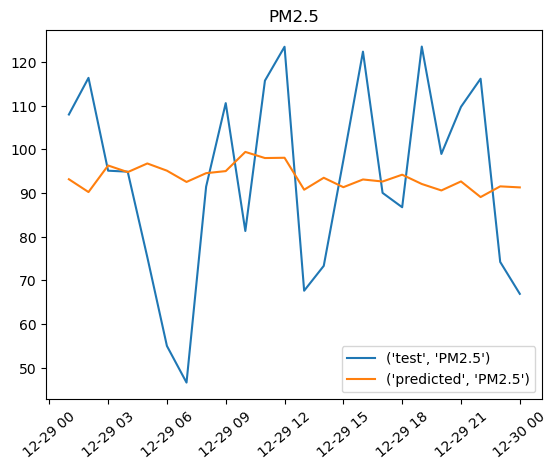

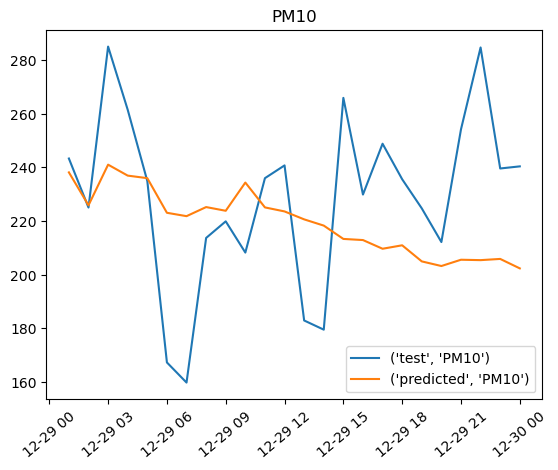

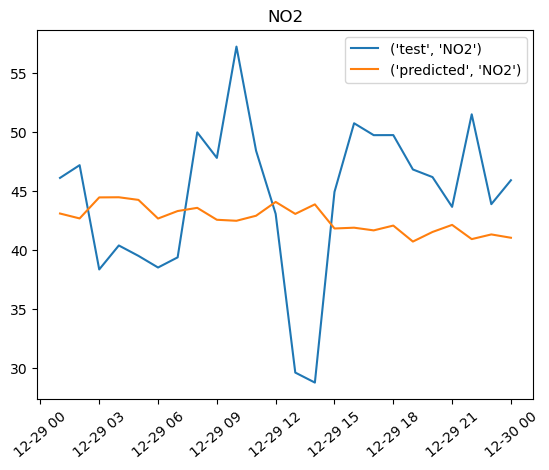

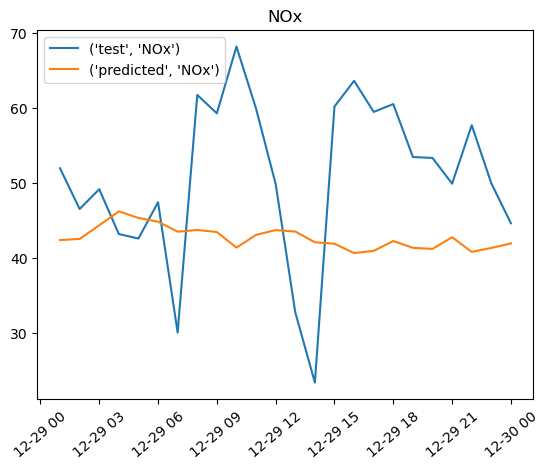

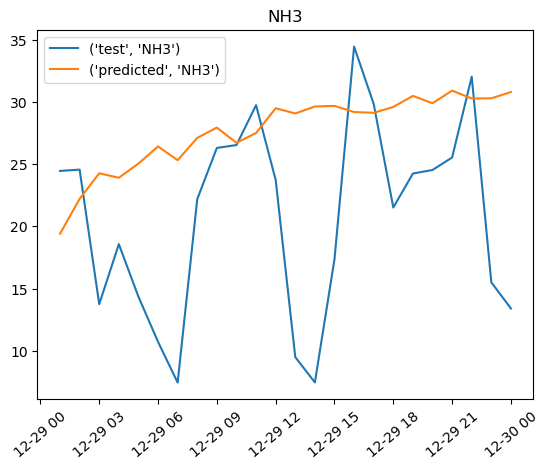

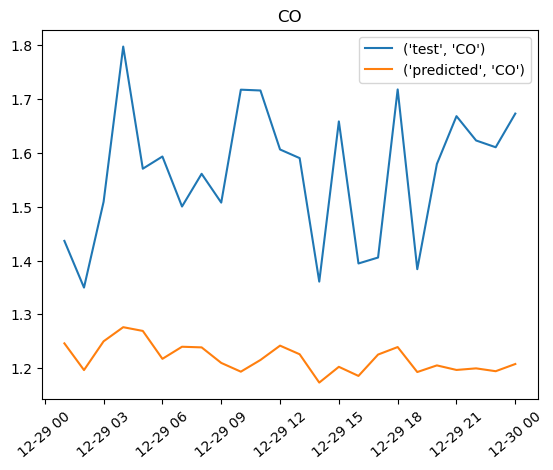

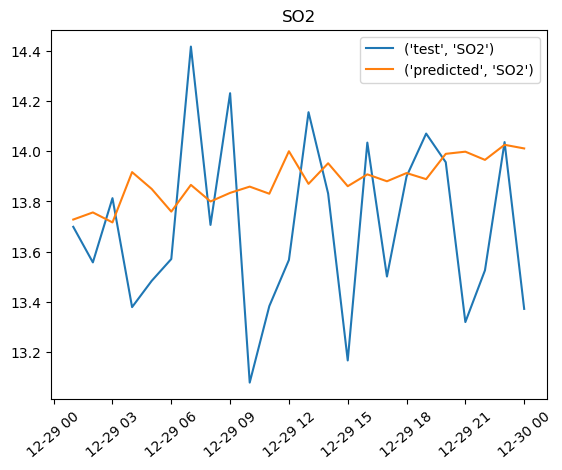

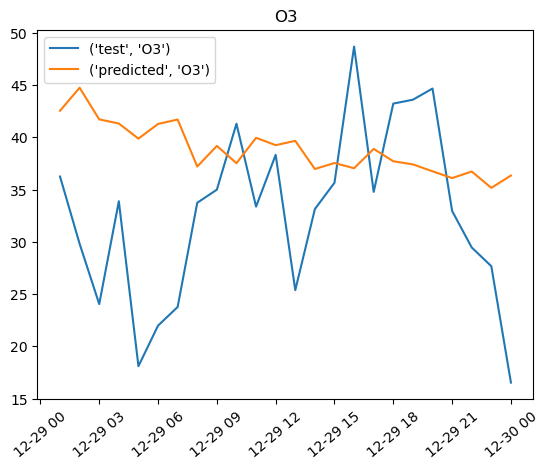

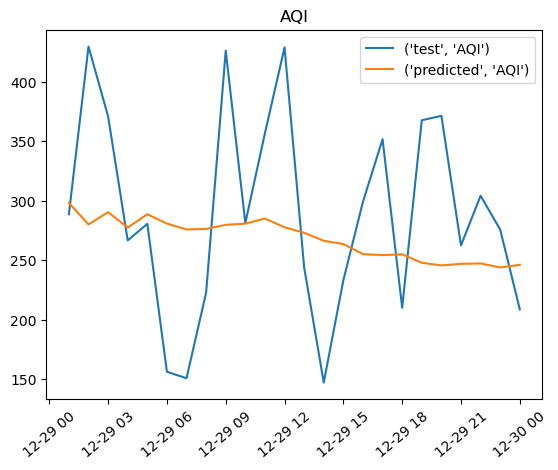

In [165]:
for i in num_col:
    plt.plot(test[i],label=("test", i))
    plt.plot(predicted[i],label=("predicted", i))
    plt.title(i)
    plt.legend()
    plt.xticks(rotation=40)
    plt.show()

In [ ]:
def mape(test,pred):
    m=np.abs((pred-test)/test)*100
    m=m[1].mean()
    return m

In [ ]:
#def rmse(test,pred)

In [ ]:
num_col

In [ ]:
l1=[]
l2=[]
for i in num_col:
    m=mape(predicted[i],test[i])
    l1.append(i)
    l2.append(m)
ovrl_mape=pd.DataFrame({"index":l1,
                        "mape":l2})
ovrl_mape=pd.DataFrame(ovrl_mape)
print(ovrl_mape)
overall_mean=ovrl_mape["mape"].mean()
print(f"\n\nOverall average in VAR Model:{overall_mean}")

### ARIMA Model

In [124]:
from statsmodels.tsa.arima.model import ARIMA

In [166]:
arima_pred=pd.DataFrame()
for i in num_col:
    model=ARIMA(train[i],order=(1,0,0))
    res=model.fit()
    #print(res.summary())
    
    #Prediction in Dataframe
    arima_pred[i]=res.predict(start="2019-12-29 01:00:00",end="2019-12-30 00:00:00")    

In [167]:
arima_pred.shape

(24, 9)

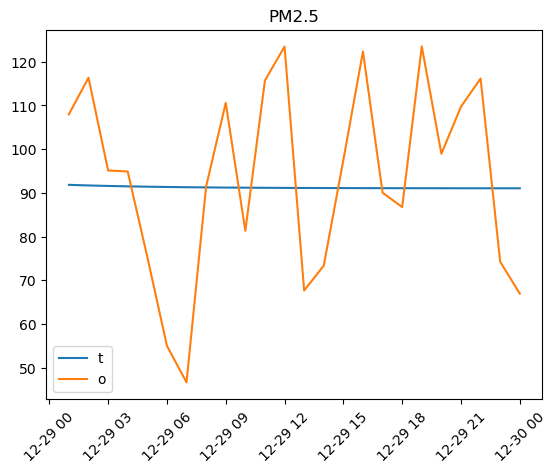

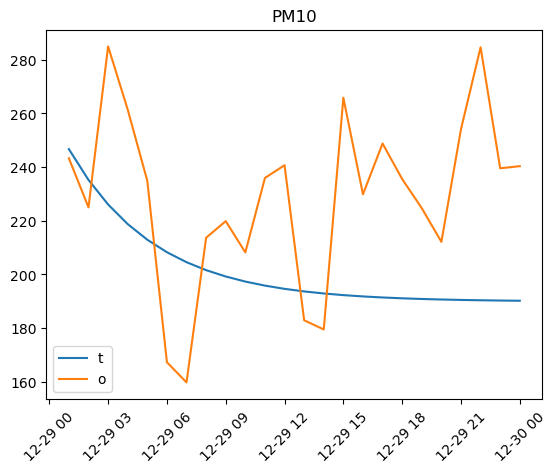

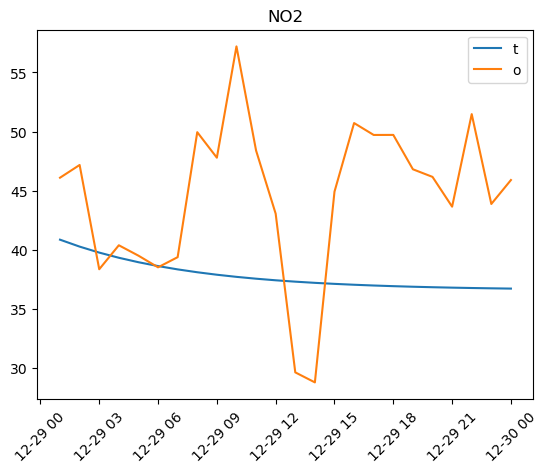

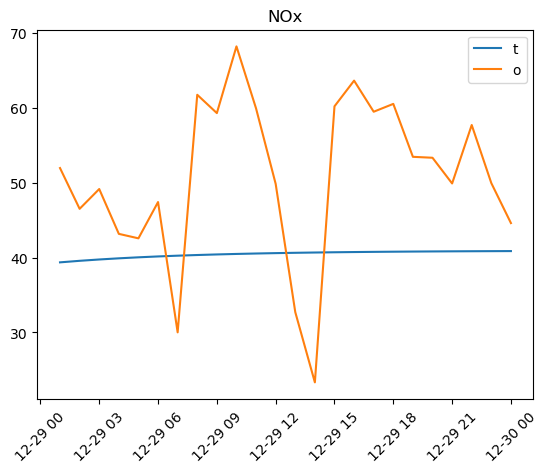

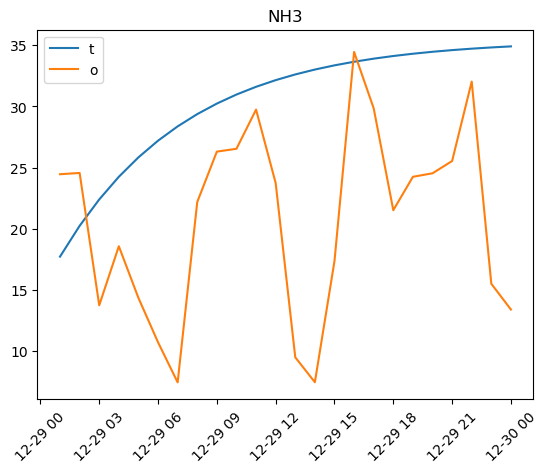

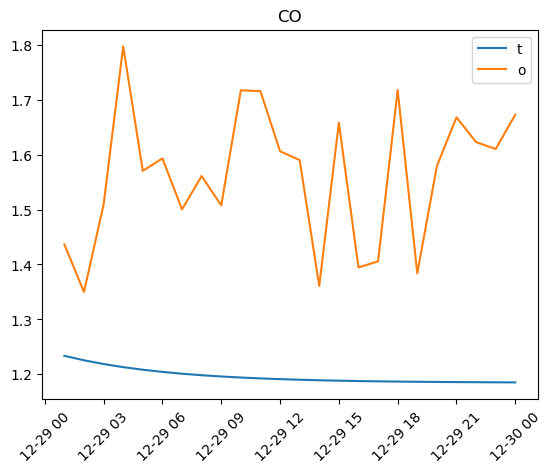

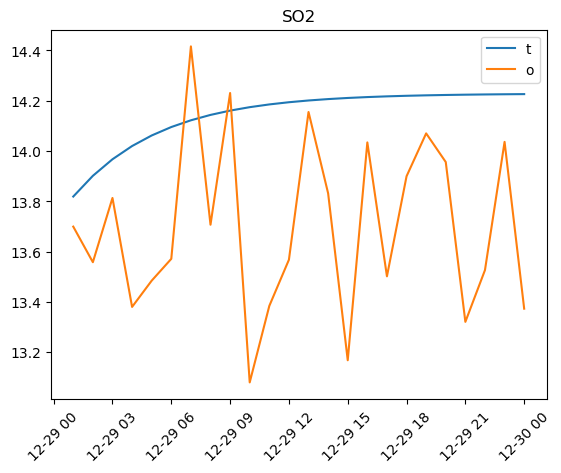

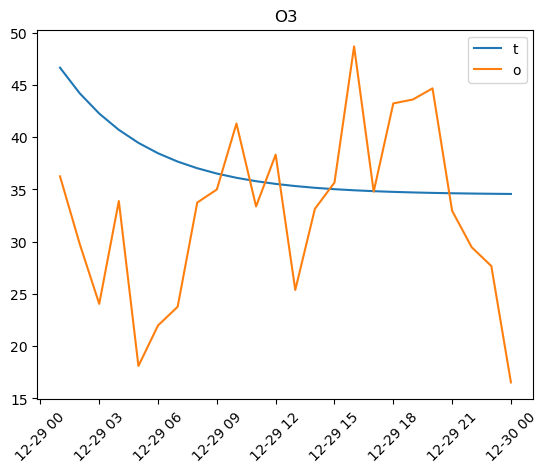

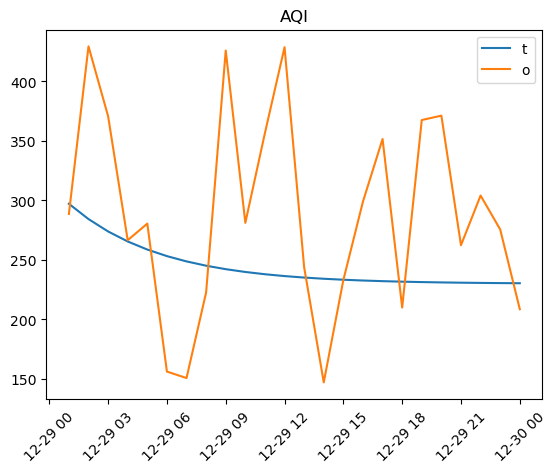

In [168]:
for i in num_col:
    plt.plot(arima_pred[i],label="predicted")
    plt.plot(test[i],label="test")
    plt.title(i)
    plt.legend("topright")
    plt.xticks(rotation=45)#plt.xticks(rotation=40)
    plt.show()

In [169]:
arima_mape=[]
for i in num_col:
    ar_m=mape(arima_pred[i],test[i])
    arima_mape.append(ar_m)
    
arima_mape_df=pd.DataFrame({"index":num_col,
               "arima_mape":arima_mape})

print(arima_mape_df)


   index  arima_mape
0  PM2.5   26.905416
1   PM10    4.344034
2    NO2   17.158991
3    NOx   17.532738
4    NH3   21.353524
5     CO   10.156169
6    SO2    2.470790
7     O3   32.550469
8    AQI   51.060451


In [170]:
print(f"\nOverall average Mean Average Percentage Error in ARIMA Model: {arima_mape_df.arima_mape.mean()}\n")


Overall average Mean Average Percentage Error in ARIMA Model: 20.392509164368107



## Results of ARIMA & VAR Model 

In [171]:
print(arima_mape_df)

   index  arima_mape
0  PM2.5   26.905416
1   PM10    4.344034
2    NO2   17.158991
3    NOx   17.532738
4    NH3   21.353524
5     CO   10.156169
6    SO2    2.470790
7     O3   32.550469
8    AQI   51.060451


In [172]:
print(f"\nARIMA Model\nOverall Mean Average Percentage Error : {arima_mape_df.arima_mape.mean()}\n")


ARIMA Model
Overall Mean Average Percentage Error : 20.392509164368107



In [173]:
print(ovrl_mape)

   index       mape
0  PM2.5  18.518938
1   PM10  33.704915
2    NO2  13.340502
3    NOx  10.799166
4    NH3  19.972830
5     CO  11.880343
6    SO2   2.902586
7     O3  29.075088
8    AQI   3.121564


In [174]:
print(f"\nVAR Model\nOverall Mean Abs Percentage Error:{overall_mean}")


VAR Model
Overall Mean Abs Percentage Error:15.923992498786394


### LSTM Model

In [175]:
dataframe=pd.DataFrame(delhi["AQI"])

In [176]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [177]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [178]:
# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset
#dataframe = read_csv('AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [ ]:
# split into train and test sets
train_size = int(len(dataset) -24)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1]))

In [180]:
# create and fit the LSTM network
LSTM_model = Sequential()
LSTM_model.add(LSTM(4, input_shape=(1, look_back)))
LSTM_model.add(Dense(1))
LSTM_model.compile(loss='mean_squared_error', optimizer='adam')
LSTM_model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
8687/8687 - 25s - loss: 0.0152 - 25s/epoch - 3ms/step
Epoch 2/50
8687/8687 - 24s - loss: 0.0117 - 24s/epoch - 3ms/step
Epoch 3/50
8687/8687 - 22s - loss: 0.0116 - 22s/epoch - 3ms/step
Epoch 4/50
8687/8687 - 22s - loss: 0.0116 - 22s/epoch - 3ms/step
Epoch 5/50
8687/8687 - 22s - loss: 0.0116 - 22s/epoch - 3ms/step
Epoch 6/50
8687/8687 - 21s - loss: 0.0116 - 21s/epoch - 2ms/step
Epoch 7/50
8687/8687 - 22s - loss: 0.0115 - 22s/epoch - 3ms/step
Epoch 8/50
8687/8687 - 23s - loss: 0.0116 - 23s/epoch - 3ms/step
Epoch 9/50
8687/8687 - 23s - loss: 0.0115 - 23s/epoch - 3ms/step
Epoch 10/50
8687/8687 - 24s - loss: 0.0115 - 24s/epoch - 3ms/step
Epoch 11/50
8687/8687 - 22s - loss: 0.0115 - 22s/epoch - 2ms/step
Epoch 12/50
8687/8687 - 23s - loss: 0.0115 - 23s/epoch - 3ms/step
Epoch 13/50
8687/8687 - 22s - loss: 0.0115 - 22s/epoch - 2ms/step
Epoch 14/50
8687/8687 - 23s - loss: 0.0115 - 23s/epoch - 3ms/step
Epoch 15/50
8687/8687 - 22s - loss: 0.0115 - 22s/epoch - 3ms/step
Epoch 16/50
8687/86

In [181]:
# make predictions
trainPredict = LSTM_model.predict(trainX)
testPredict = LSTM_model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

1/1 [==============================] - 0s 31ms/step


In [182]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 50.23 RMSE
Test Score: 92.11 RMSE


In [201]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [205]:
dataset.shape

(8713, 1)

In [202]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

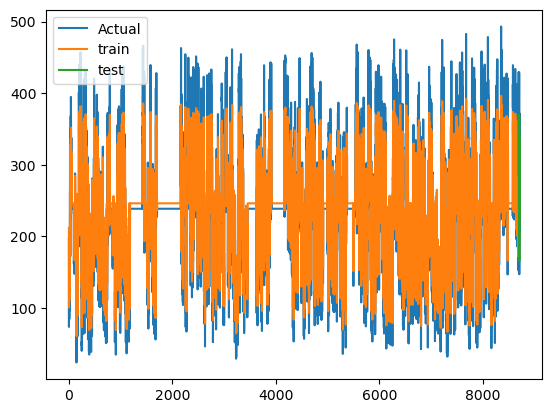

In [203]:

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label="Actual")
plt.plot(trainPredictPlot,label="train")
plt.plot(testPredictPlot,label="test")
plt.legend()
plt.show()

## LSTM Result

In [183]:
# calculate root mean squared error
trainScore = (mape(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f MAPE' % (trainScore))
testScore = (mape(testY[0], testPredict[:,0]))
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 10.40 MAPE
Test Score: 0.43 MAPE
